In [1]:
# 추가되는 패키지는 여기에서 import 해주세요
import warnings
warnings.filterwarnings('ignore')
import missingno
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pickle
from sklearn.externals import joblib
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from itertools import count
import plotly.express as px


import geopy.distance
import matplotlib.legend as legend 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA


pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 500)
# matplotlib 설정
mpl.use('Agg')
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline
# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [212]:
data = pd.read_csv('JJ_train.csv')

In [213]:
data.tail()

,Unnamed: 0,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,ride6,ride7,ride8,ride9,ride10,ride11,off6,off7,off8,off9,off10,off11,ride18,holiday,date_day,date_dayofweek,date_dayofname
10068,10068,412702,2019-09-30,31340000,시내,151,한국병원,33.49979,126.51769,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,30,0,Monday
10069,10069,413834,2019-09-30,31830000,시내,151,한국병원,33.49979,126.51769,0.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30,0,Monday
10070,10070,414602,2019-09-30,32370000,시내,151,한국병원,33.49979,126.51769,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30,0,Monday
10071,10071,414720,2019-09-30,32390000,시내,151,한국병원,33.49979,126.51769,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30,0,Monday
10072,10072,414891,2019-09-30,32470000,시내,151,한국병원,33.49979,126.51769,0.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,30,0,Monday


In [214]:
data = data.drop(data.columns[0], axis = 1)

In [215]:
data.tail()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,ride6,ride7,ride8,ride9,ride10,ride11,off6,off7,off8,off9,off10,off11,ride18,holiday,date_day,date_dayofweek,date_dayofname
10068,412702,2019-09-30,31340000,시내,151,한국병원,33.49979,126.51769,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,30,0,Monday
10069,413834,2019-09-30,31830000,시내,151,한국병원,33.49979,126.51769,0.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30,0,Monday
10070,414602,2019-09-30,32370000,시내,151,한국병원,33.49979,126.51769,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30,0,Monday
10071,414720,2019-09-30,32390000,시내,151,한국병원,33.49979,126.51769,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30,0,Monday
10072,414891,2019-09-30,32470000,시내,151,한국병원,33.49979,126.51769,0.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,30,0,Monday


In [216]:
data.rename(columns={'6~7_ride': 'ride6', '7~8_ride': 'ride7', '8~9_ride': 'ride8',\
                      '9~10_ride': 'ride9', '10~11_ride': 'ride10', '11~12_ride': 'ride11', 
                      '6~7_takeoff': 'off6', '7~8_takeoff': 'off7', '8~9_takeoff': 'off8', \
                      '9~10_takeoff': 'off9', '10~11_takeoff': 'off10', '11~12_takeoff': 'off11',\
                      '18~20_ride': 'ride18'},inplace=True)
data.tail(2)

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,ride6,ride7,ride8,ride9,ride10,ride11,off6,off7,off8,off9,off10,off11,ride18,holiday,date_day,date_dayofweek,date_dayofname
10071,414720,2019-09-30,32390000,시내,151,한국병원,33.49979,126.51769,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30,0,Monday
10072,414891,2019-09-30,32470000,시내,151,한국병원,33.49979,126.51769,0.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,30,0,Monday


In [217]:
### 휴일 체크 [2019년 9월, 2019년 10월]
# 2019년 9월 12,13,14 : 추석

def check_holiday(data):
    holi = ['2019-09-12','2019-09-13', '2019-09-14']
    data['holiday'] = [1 if dates  in holi else 0 for dates in data.date]
    return data

data = check_holiday(data)

In [218]:
data.tail()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,ride6,ride7,ride8,ride9,ride10,ride11,off6,off7,off8,off9,off10,off11,ride18,holiday,date_day,date_dayofweek,date_dayofname
10068,412702,2019-09-30,31340000,시내,151,한국병원,33.49979,126.51769,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,30,0,Monday
10069,413834,2019-09-30,31830000,시내,151,한국병원,33.49979,126.51769,0.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30,0,Monday
10070,414602,2019-09-30,32370000,시내,151,한국병원,33.49979,126.51769,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30,0,Monday
10071,414720,2019-09-30,32390000,시내,151,한국병원,33.49979,126.51769,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30,0,Monday
10072,414891,2019-09-30,32470000,시내,151,한국병원,33.49979,126.51769,0.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,30,0,Monday


In [220]:
#확인
data.query('date == "2019-09-03"')[['date','holiday']].head()

,date,holiday
81,2019-09-03,0
82,2019-09-03,0
83,2019-09-03,0
84,2019-09-03,0
85,2019-09-03,0


In [221]:
#확인
data.query('date == "2019-09-12"')[['date','holiday']].head()

,date,holiday
441,2019-09-12,1
442,2019-09-12,1
443,2019-09-12,1
444,2019-09-12,1
445,2019-09-12,1


In [222]:
data['date'] = data['date'].astype('datetime64')
# 9월 1일 ~ 9월 30일 데이터이니까, day만 따로 가져옴
data['date_day'] = data['date'].dt.day
# 월(0) ~ 일(6) 데이터로 변환
data['date_dayofweek'] = data['date'].dt.dayofweek
data['date_dayofname']= data['date'].dt.weekday_name
data.tail()[['date','date_dayofweek','date_day','date_dayofname']]

,date,date_dayofweek,date_day,date_dayofname
10068,2019-09-30,0,30,Monday
10069,2019-09-30,0,30,Monday
10070,2019-09-30,0,30,Monday
10071,2019-09-30,0,30,Monday
10072,2019-09-30,0,30,Monday


In [223]:
data.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', 'ride6', 'ride7', 'ride8', 'ride9', 'ride10',
       'ride11', 'off6', 'off7', 'off8', 'off9', 'off10', 'off11', 'ride18',
       'holiday', 'date_day', 'date_dayofweek', 'date_dayofname'],
      dtype='object')

In [224]:
data['ride68'] = data.ride6 + data.ride7
data['ride810'] = data.ride8 + data.ride9
data['ride1012'] = data.ride10 + data.ride11

data['off68'] = data.off6 + data.off7
data['off810'] = data.off8 + data.off9
data['off1012'] = data.off10 + data.off11

In [225]:
data.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', 'ride6', 'ride7', 'ride8', 'ride9', 'ride10',
       'ride11', 'off6', 'off7', 'off8', 'off9', 'off10', 'off11', 'ride18',
       'holiday', 'date_day', 'date_dayofweek', 'date_dayofname', 'ride68',
       'ride810', 'ride1012', 'off68', 'off810', 'off1012'],
      dtype='object')

In [226]:
data_y = data.ride18

In [227]:
data.drop(['ride6','ride7','ride8','ride9','ride10','ride11','off6','off7','off8','off9','off10','off11','ride18'], axis = 1,inplace = True)

In [229]:
data['ride18'] = data_y

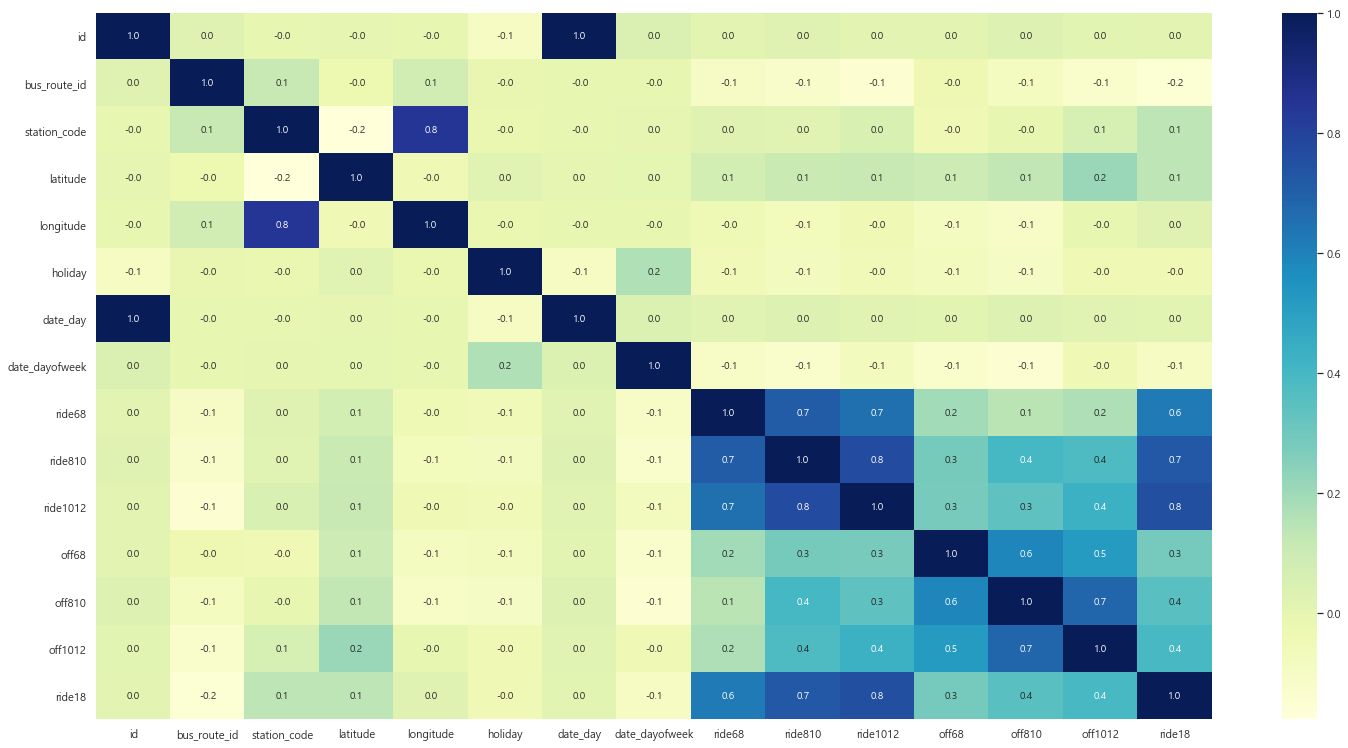

In [230]:
plt.figure(figsize=(25, 13))
sns.heatmap(data.corr(), annot=True, cmap= 'YlGnBu', fmt='.1f')
plt.show()

In [231]:
print(len(train.bus_route_id.unique()))
print(len(train.station_code.unique()))

178
10


In [233]:
data_X = data.drop('ride18', axis = 1)
data_X.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,holiday,date_day,date_dayofweek,date_dayofname,ride68,ride810,ride1012,off68,off810,off1012
0,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,0,1,6,Sunday,5.0,6.0,11.0,0.0,0.0,0.0
1,443,2019-09-01,21520000,시외,357,한라병원,33.48944,126.48508,0,1,6,Sunday,5.0,6.0,12.0,0.0,0.0,0.0
2,548,2019-09-01,21880000,시외,357,한라병원,33.48944,126.48508,0,1,6,Sunday,0.0,3.0,0.0,0.0,0.0,0.0
3,862,2019-09-01,22340000,시외,357,한라병원,33.48944,126.48508,0,1,6,Sunday,1.0,3.0,8.0,0.0,0.0,0.0
4,908,2019-09-01,22360000,시외,357,한라병원,33.48944,126.48508,0,1,6,Sunday,2.0,5.0,6.0,1.0,0.0,0.0


In [234]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size = 0.3, random_state = 13)

In [235]:
len(train_X), len(test_X)

(7051, 3022)

In [237]:
print(len(train_X.bus_route_id.unique()), len(test_X.bus_route_id.unique()))

178 175


In [242]:
train = pd.concat([train_X, train_y], axis = 1)
test = pd.concat([test_X, test_y], axis = 1)


In [243]:
train.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', 'holiday', 'date_day', 'date_dayofweek',
       'date_dayofname', 'ride68', 'ride810', 'ride1012', 'off68', 'off810',
       'off1012', 'ride18'],
      dtype='object')

In [270]:
cates = ['bus_route_id','in_out', 'station_code','holiday','date_dayofname']
unnecessaries = ['id','date','station_name','date_day','date_dayofweek','ride18','latitude','longitude'] 
varz = ['ride68','ride810','ride1012','off68','off810','off1012']

In [278]:
cols = list(train.columns)
[cols.remove(cate)for cate in cates]
[cols.remove(unnecessary) for unnecessary in unnecessaries]
varz= cols


In [279]:
scaled_varz = ['scale({})'.format(var) for var in varz]
scaled_varz

['scale(ride68)',
 'scale(ride810)',
 'scale(ride1012)',
 'scale(off68)',
 'scale(off810)',
 'scale(off1012)']

In [285]:
cate_varz = ['C({})'.format(cate) for cate in cates]
cate_varz

['C(bus_route_id)',
 'C(in_out)',
 'C(station_code)',
 'C(holiday)',
 'C(date_dayofname)']

In [286]:
'+'.join(cate_varz)

'C(bus_route_id)+C(in_out)+C(station_code)+C(holiday)+C(date_dayofname)'

In [290]:
model = sm.OLS.from_formula('ride18 ~' + '+'.join(cate_varz) +'+'+ '+'.join(scaled_varz), data = train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 ride18   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     101.6
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:27:14   Log-Likelihood:                -21981.
No. Observations:                7051   AIC:                         4.436e+04
Df Residuals:                    6851   BIC:                         4.573e+04
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [328]:
preds = result.predict()
rounded_preds = [0 if x <0 else round(x) for x in preds]

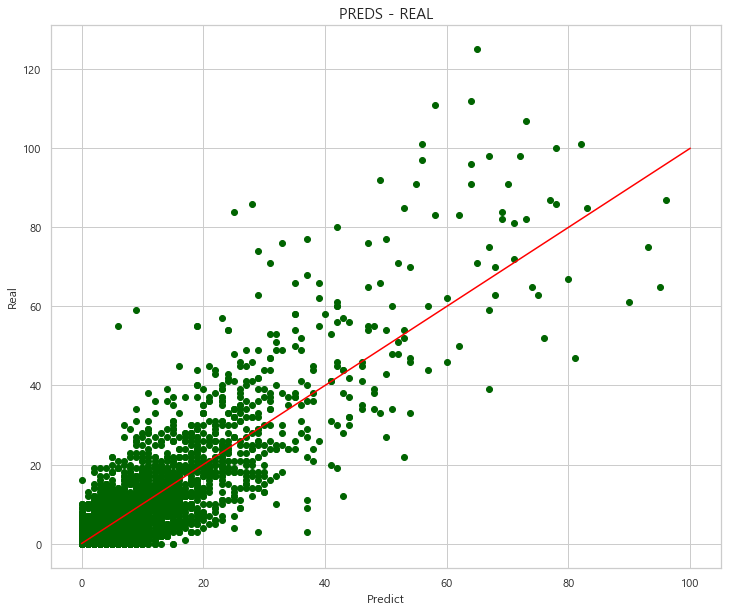

In [329]:
plt.figure(figsize = (12,10))
plt.title('PREDS - REAL', fontsize = 15)
plt.scatter(rounded_preds, train.ride18, color = 'darkgreen')
plt.xlabel('Predict')
plt.ylabel('Real')
plt.plot([0,100],[0,100], color = 'red')

plt.show()

In [333]:
new_resid = train.ride18 - rounded_preds

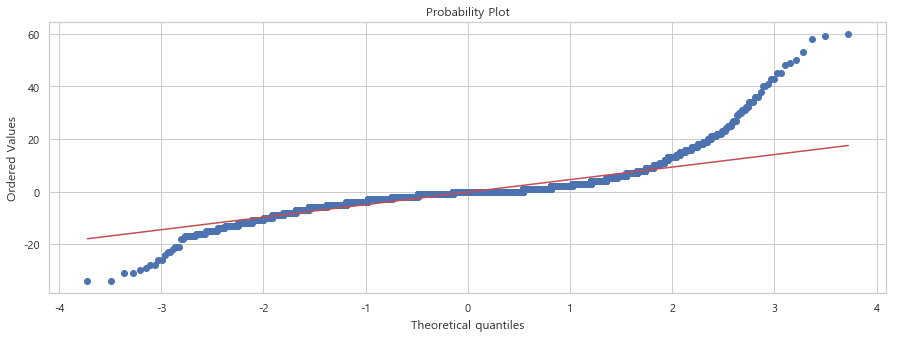

In [331]:
import scipy as sp
plt.figure(figsize = (15,5))
sp.stats.probplot(new_resid, plot = plt)
plt.show()

In [332]:
np.mean(new_resid)

-0.21457949227059991

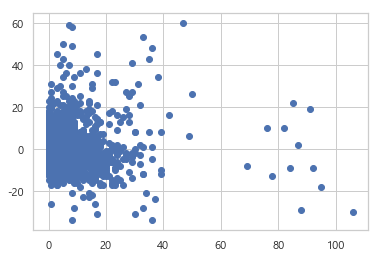

In [339]:
plt.scatter(train.ride68, new_resid)

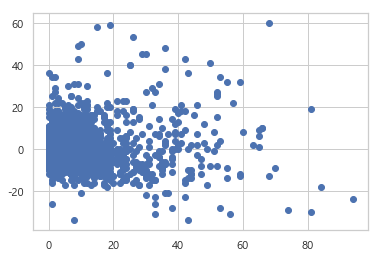

In [340]:
plt.scatter(train.ride810, new_resid)

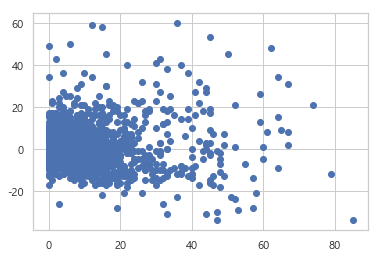

In [341]:
plt.scatter(train.ride1012, new_resid)

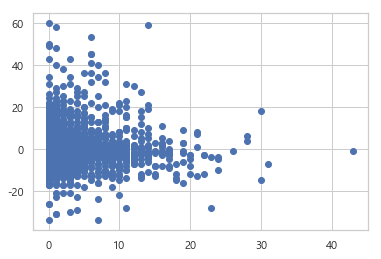

In [342]:
plt.scatter(train.off68, new_resid)

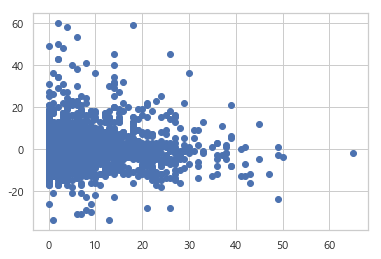

In [343]:
plt.scatter(train.off810, new_resid)

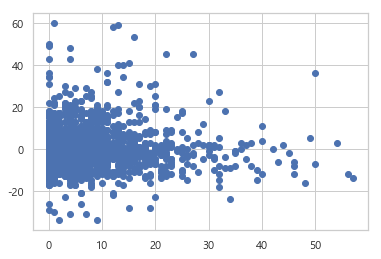

In [344]:
plt.scatter(train.off1012, new_resid)

In [345]:
scaled_varz

['scale(ride68)',
 'scale(ride810)',
 'scale(ride1012)',
 'scale(off68)',
 'scale(off810)',
 'scale(off1012)']

In [352]:
model = sm.OLS.from_formula('ride18 ~' + '+'.join(cate_varz) +'+'+ '+'.join(scaled_varz) + ' + scale(np.log(off68+1)) + scale(np.log(off1012+1))', data = train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 ride18   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     101.0
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:41:33   Log-Likelihood:                -21971.
No. Observations:                7051   AIC:                         4.435e+04
Df Residuals:                    6849   BIC:                         4.573e+04
Df Model:                         201                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### 아웃라이어 제거

### k-fold 검정

### 테스트